In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
plt.style.use('default')

In [2]:
df = pd.read_csv('../dataset/uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.shape

(200000, 9)

**Finding the distance between the pickup and dropoff location.**

In [4]:
from math import sin, cos, sqrt, atan2, radians
R = 6373.0

lat1 = radians(40.790844)
lon1 = radians(-73.976124)
lat2 = radians(40.803349)
lon2 = radians(-73.965316)

dlon = lon2 - lon1
dlat = lat2 - lat1

a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = R * c
distance

1.6622050981962737

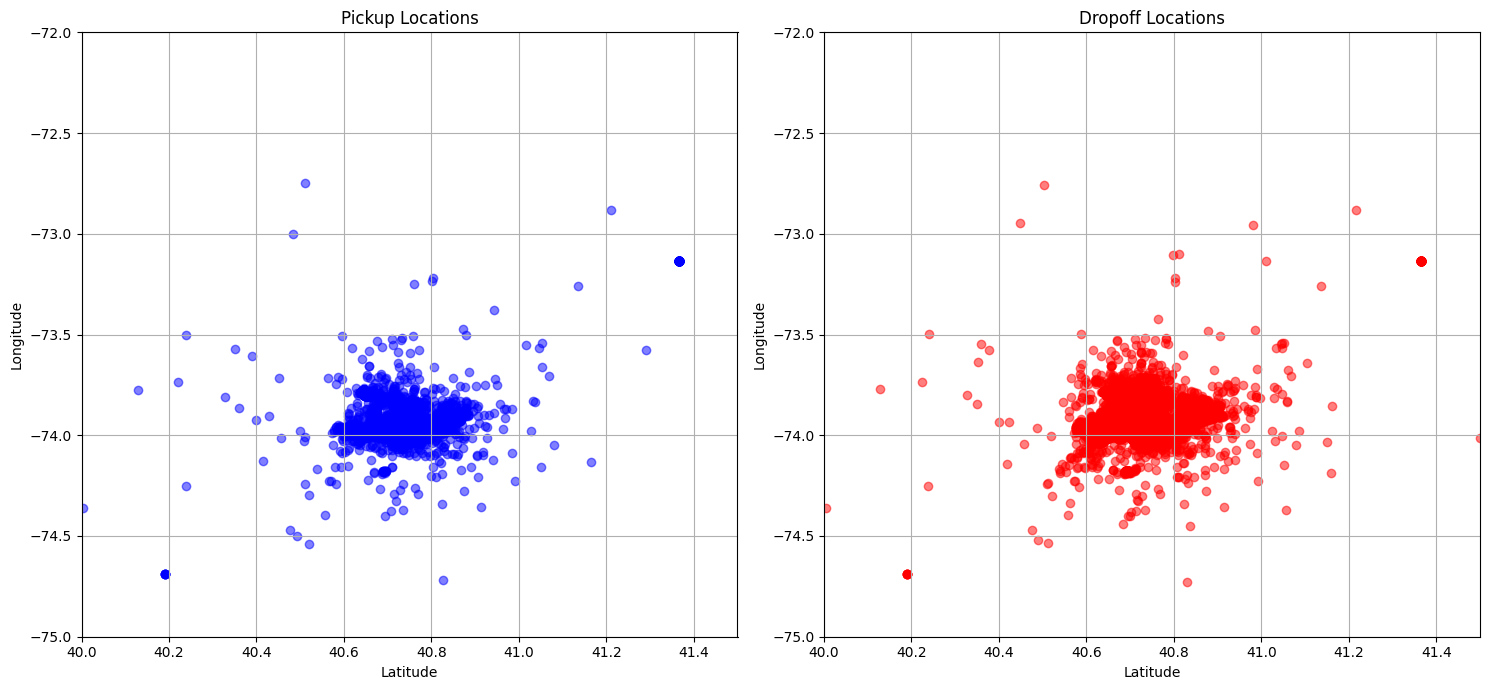

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First subplot for pickup locations
axs[0].scatter(x = df['pickup_latitude'], y = df['pickup_longitude'], c='blue', alpha=0.5)
axs[0].set_xlim(40, 41.5)
axs[0].set_ylim(-75, -72)
axs[0].set_title('Pickup Locations')
axs[0].set_xlabel('Latitude')
axs[0].set_ylabel('Longitude')
axs[0].grid(True)

# Second subplot for dropoff locations
axs[1].scatter(x = df['dropoff_latitude'], y = df['dropoff_longitude'], c='red', alpha=0.5)
axs[1].set_xlim(40, 41.5)
axs[1].set_ylim(-75, -72)
axs[1].set_title('Dropoff Locations')
axs[1].set_xlabel('Latitude')
axs[1].set_ylabel('Longitude')
axs[1].grid(True)

plt.tight_layout()
plt.show()

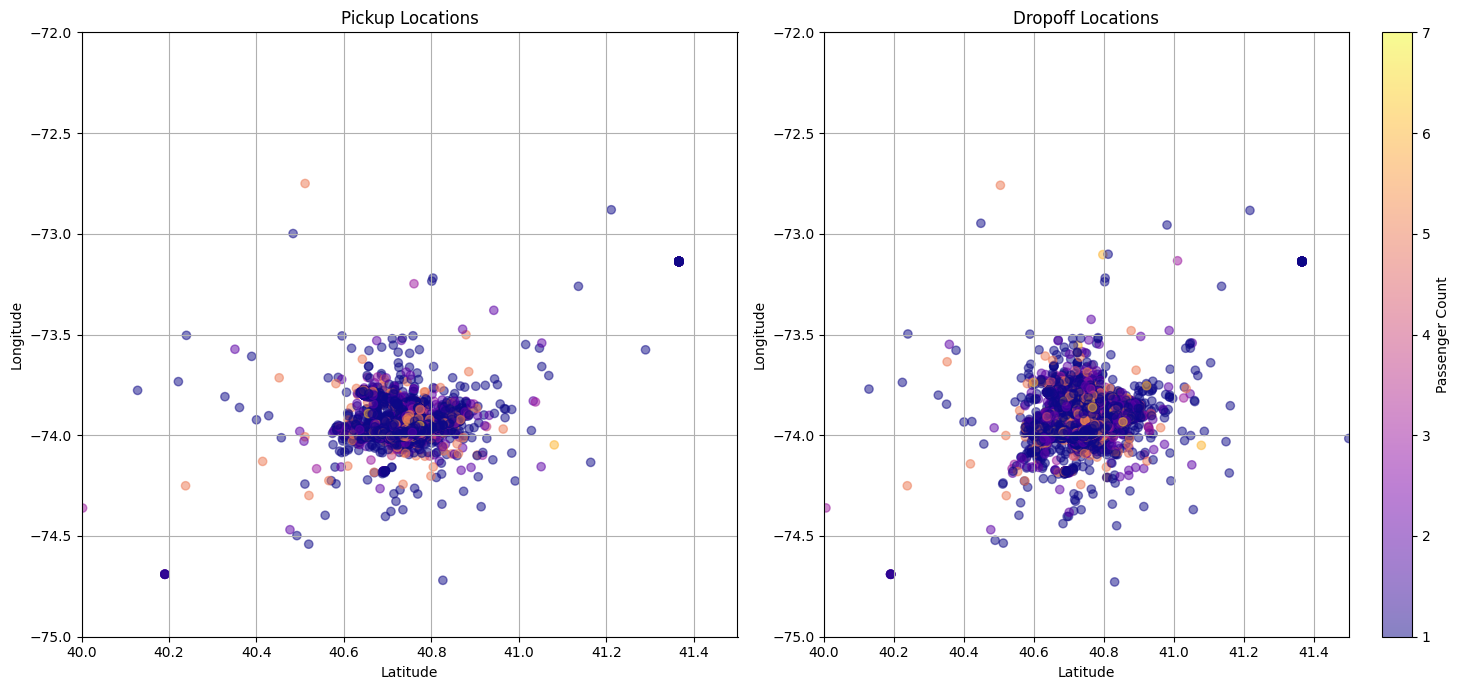

In [6]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))

# First subplot for pickup locations
axs[0].scatter(x = df['pickup_latitude'], y = df['pickup_longitude'], c=df['passenger_count'], cmap='plasma', alpha=0.5,vmin=1, vmax=7)
axs[0].set_xlim(40, 41.5)
axs[0].set_ylim(-75, -72)
axs[0].set_title('Pickup Locations')
axs[0].set_xlabel('Latitude')
axs[0].set_ylabel('Longitude')
axs[0].grid(True)

# Second subplot for dropoff locations
sc = axs[1].scatter(x = df['dropoff_latitude'], y = df['dropoff_longitude'], c=df['passenger_count'], cmap='plasma', alpha=0.5,vmin=1, vmax=7)
axs[1].set_xlim(40, 41.5)
axs[1].set_ylim(-75, -72)
axs[1].set_title('Dropoff Locations')
axs[1].set_xlabel('Latitude')
axs[1].set_ylabel('Longitude')
axs[1].grid(True)

cbar = plt.colorbar(sc, ax=axs[1])
cbar.set_label('Passenger Count')
plt.tight_layout()
plt.show()

In [7]:
df['passenger_count'].value_counts()

passenger_count
1      138425
2       29428
5       14009
3        8881
4        4276
6        4271
0         709
208         1
Name: count, dtype: int64